## **British Airways DS Virtual Experience Program**

### **Task 1** 
#### Title: Web Scraping to gain company insights

#### **Exploratory Data Analysis**
We explore the data and try to get insights into what stakeholders would like to see based on the reviews given by the customers 

In [2]:
!pip install plotly

In [4]:
!pip install wordcloud

In [11]:
#Importing all necessary libraries 
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [6]:
#Read in the cleaned dataframe
df = pd.read_csv("cleaned-BA-reviews.csv")

In [7]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified | Probably the worst business ...      5  2023-01-02   
1  ✅ Trip Verified | Definitely not recommended, ...      1  2023-01-02   
2  ✅ Trip Verified |  BA shuttle service across t...      2  2023-01-02   
3  ✅ Trip Verified | I must admit like many other...      8  2023-01-01   
4  Not Verified |  When will BA update their Busi...      6  2022-12-30   

          country  verified                                    review_raw_text  
0   United States      True  probably worst business class experience ever ...  
1   United States      True  definitely recommended especially business cla...  
2  United Kingdom      True  ba shuttle service across uk still surprisingl...  
3  United Kingdom      True  must admit like many others tend avoid ba long...  
4  United Kingdom     False  verified ba update business class cabin across...

#### What is the average overall rating given to British Airways airline

In [8]:
df['stars'].mean()

4.836527293844367

In [12]:
base_color = sb.color_palette()[0]

#### Total Count for each Rating from (1-10) chronologically 

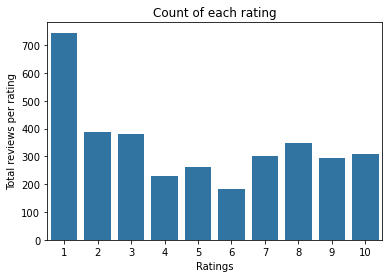

In [13]:
rating_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sb.countplot(data = df, x = 'stars', color = base_color, order = rating_order)
plt.xlabel('Ratings')
plt.ylabel('Total reviews per rating')
plt.title('Count of each rating')
plt.show();

In [14]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [15]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [16]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [18]:
df_ratings.sort_values(by='Stars', inplace=True)

In [19]:
df_ratings

Stars  total_counts  pct_values
0      1           745       21.63
1      2           387       11.24
2      3           379       11.00
8      4           231        6.71
7      5           261        7.58
9      6           184        5.34
5      7           303        8.80
3      8           349       10.13
6      9           295        8.57
4     10           310        9.00

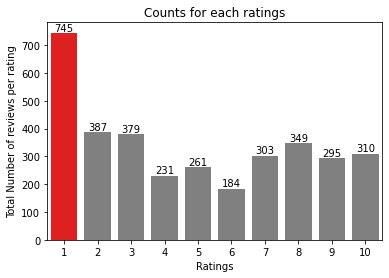

In [81]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts]
ax = sb.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)

ax.bar_label(ax.containers[0])
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews per rating")
ax.set_title("Counts for each ratings")
plt.savefig('countperratings.png')


#### How many countries are the reviews from 

In [27]:
print(str(len(df.country.unique())) + " Countries")

69 Countries


#### Top 5 countries are most reviews from?

In [28]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [29]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

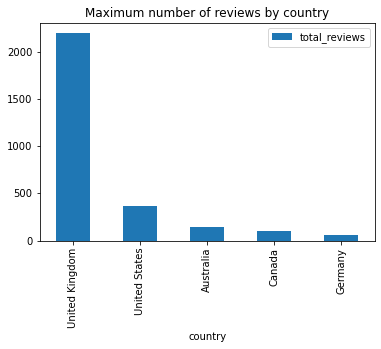

In [84]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of reviews by country")
plt.savefig('topcountries.png')

#### Which country provided on average highest ratings?

In [35]:
df_country_rating_highest = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [36]:
#renaming columns
df_country_rating_highest.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

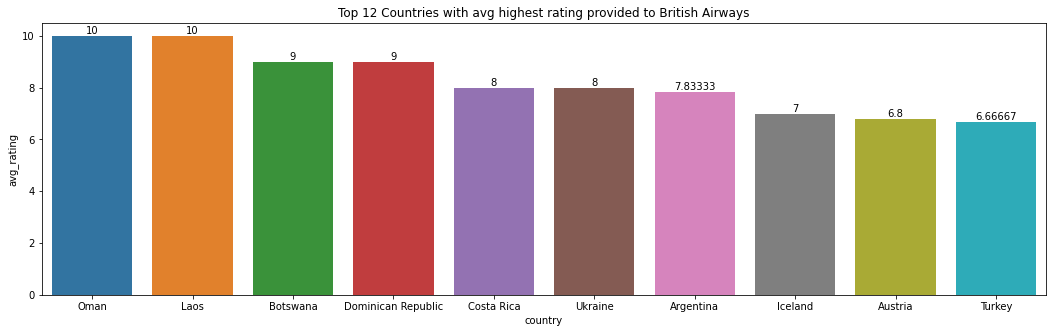

In [37]:
#Top 10 countries with the highest average ratings 
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sb.barplot(x='country', y='avg_rating', data=df_country_rating_highest[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Which country provided on average lowest ratings?

In [38]:
df_country_rating_lowest = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values()).reset_index()

In [39]:
df_country_rating_lowest.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg lowest rating provided to British Airways')

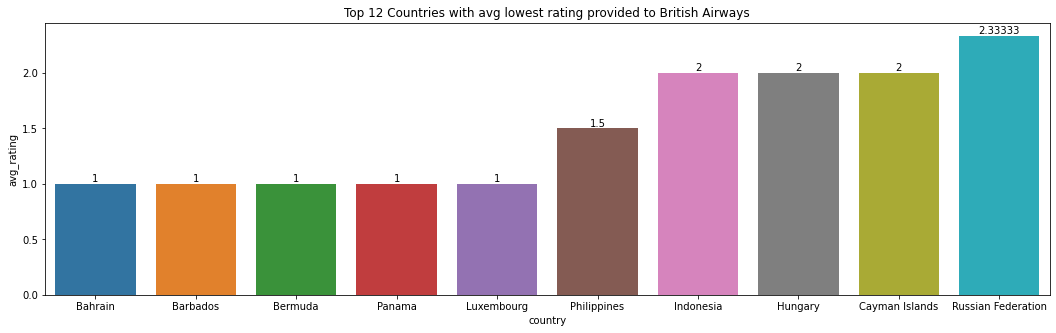

In [40]:
#Top 10 countries with the lowest average ratings 
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sb.barplot(x='country', y='avg_rating', data=df_country_rating_lowest[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg lowest rating provided to British Airways")

#### Time Series Analysis

In [41]:
df.dtypes

reviews            object
stars               int64
date               object
country            object
verified             bool
review_raw_text    object
dtype: object

In [42]:
#converting the date column to a datetime datatype
df.date = pd.to_datetime(df.date)

In [45]:
df.dtypes

reviews                    object
stars                       int64
date               datetime64[ns]
country                    object
verified                     bool
review_raw_text            object
dtype: object

In [46]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

This basically shows that number of reviews generally declined between 2020 and 2021 which were years majorly affected by the covid 19 pandemic that caused travel restrictions 

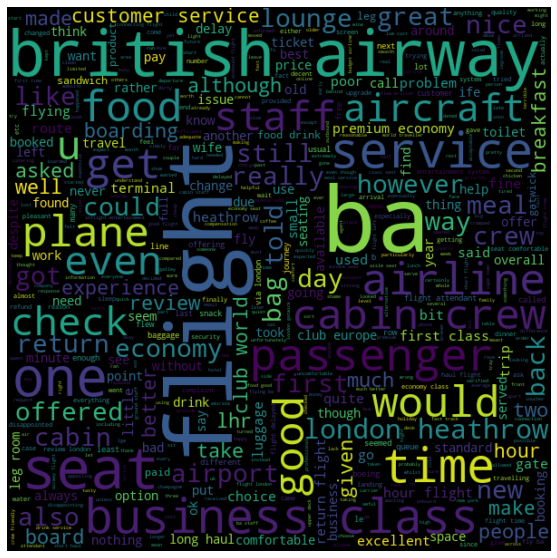

In [54]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.review_raw_text)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are a lot of generic words that does not set the idea of whether the review is positive or negative. Example words like "passenger", "flight", "ba", "british airway" etc. does not add conlcusive value hence we can include them in a stopwords list 

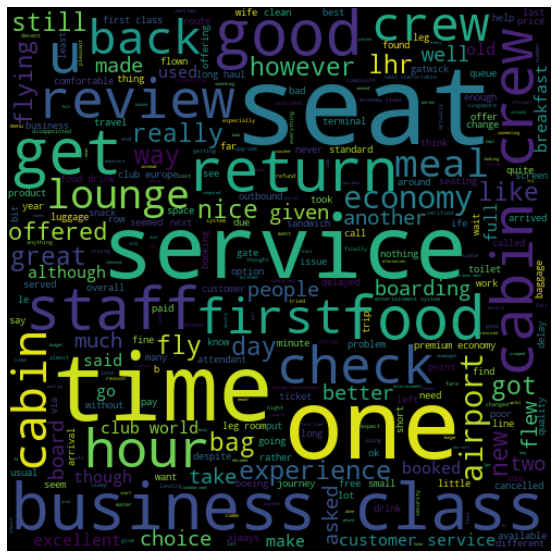

In [82]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.review_raw_text)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also", "passenger", "london", "heathrow", "aircraft", "could", "even", "would"])                 
#Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordchartplot.png')
plt.show()


#### Word Frequency

In [56]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

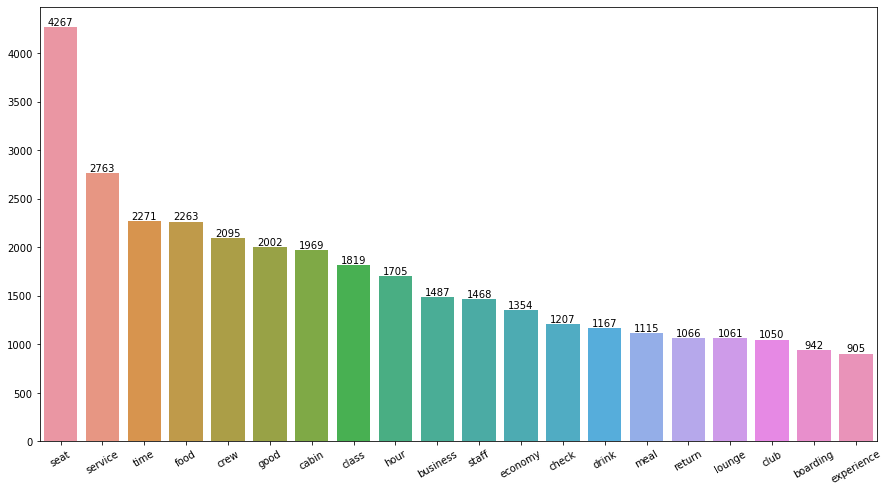

In [83]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.savefig('keywords.png')

We notice what customers are really talking about here, we can see that 'Seat', 'Service', 'Time', and 'Food' are major keywords spoken frequently about, which are all very important to customers. However, we still cant tell what the customers are expressing with these keywords. To bring some significance to these terms, we would employ the use of ngram plots to note if the experience was positive/negative.


#### Word Frequency with N-gram

<AxesSubplot:>

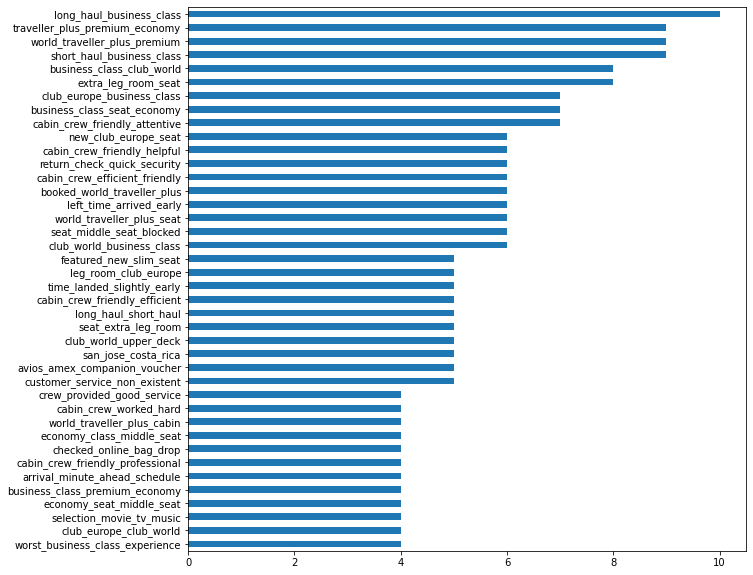

In [58]:

import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.review_raw_text)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

- We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, cabin_crew_worked_hard etc. So certainly customers are providing good reviews about cabin crew staff of British Airways, also notice how some negative terms with business class like worst_business_class_experience etc



- However, there is another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratings 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience. 

In [59]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

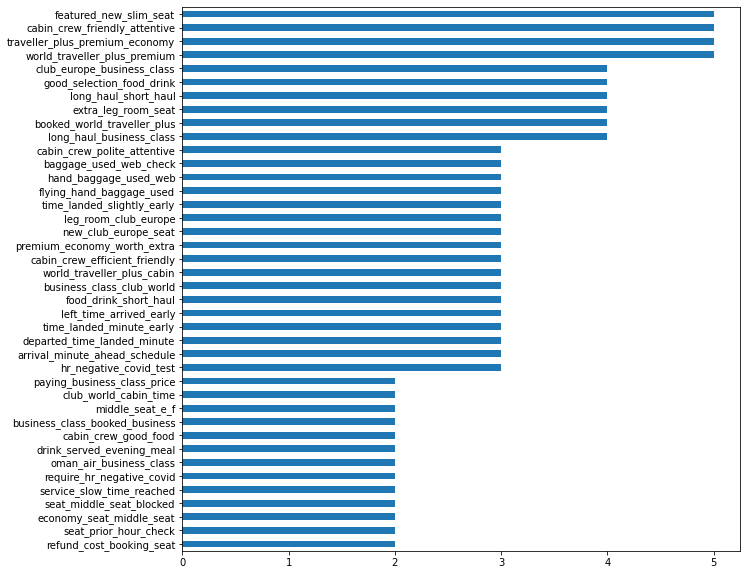

In [62]:
reviews_1_3 = " ".join(ratings_1_3.review_raw_text)
reviews_4_6 = " ".join(ratings_4_6.review_raw_text)
reviews_7_10 = " ".join(ratings_7_10.review_raw_text)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

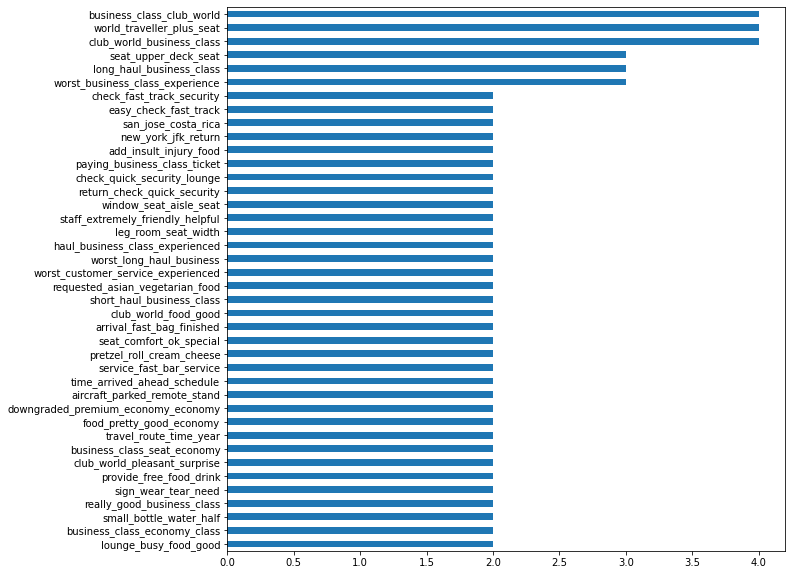

In [63]:
#ratings 4-6
new_words = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words,4)

<AxesSubplot:>

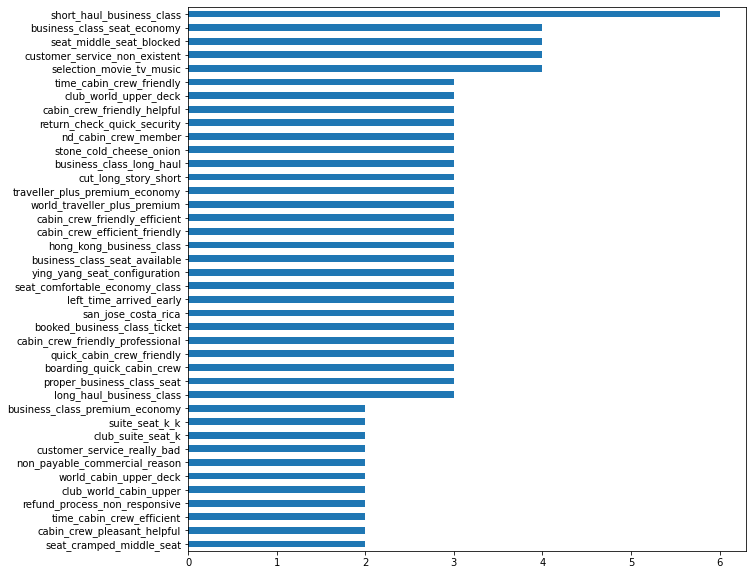

In [64]:
#Ratings 1-3
new_words = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words,4)

#### **Topic Modeling with LDA**
We have already cleaned our reviews. However, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library. 

In [71]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.review_raw_text).toarray()
tf_feature_names = vect.get_feature_names()

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [73]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0            ba           637.5        flight          1707.6        flight   
1          seat           401.6          good           983.9          seat   
2       airline           270.1            ba           909.4          crew   
3       service           228.4        lounge           818.3         cabin   
4       economy           179.8       service           793.3            ba   
5          cost           177.2          crew           769.8          food   
6          food           172.6          time           746.0       service   
7        flight           169.3          food           637.8          meal   
8          even           149.8      boarding           622.9          good   
9         cabin           138.2          club           607.7          time   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          2223.9          seat          1922.3          deck            36.0   
1          1114.8         class          1157.5         upper            31.1   
2          1027.6      business           959.0            st            15.7   
3          1005.1        flight           818.9         lucia            15.5   
4          1005.0            ba           764.9          club            14.3   
5           997.4        airway           631.2           lhr            12.3   
6           850.8       british           621.3         vegan            11.4   
7           832.7          food           415.5         world            10.0   
8           727.0       airline           394.2        rather             9.9   
9           689.7         first           391.6        dinner             9.3   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0         prawn             7.7        flight          1460.1        flight   
1       chicken             7.6            ba           725.7            ba   
2          aire             7.0      customer           509.2           bag   
3        buenos             6.8        airway           474.0         check   
4         curry             6.8       british           466.7          time   
5          thai             6.0          hour           448.1          hour   
6           fco             5.8       service           447.1          told   
7          main             5.7        london           370.1         staff   
8       starter             5.3           day           339.9        london   
9          dish             5.3         would           315.5           one   

  Topic 7 weights  
0           897.7  
1           597.2  
2           449.2  
3           416.6  
4           391.2  
5           385.6  
6           375.8  
7           362.1  
8           339.6  
9           326.4

There are certain words that are not useful to detect the tone of the reviews overall like "flight", "britsh airways", "passenger", "ba"etc.

#### **Topic modeling with NMF**

In [74]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[2.68663383e-01, 3.14954533e-01],
       [1.26767118e-01, 3.12047863e-05],
       [3.96616372e-02, 4.25972982e-02],
       ...,
       [1.08320813e-01, 1.76242742e-01],
       [2.38718397e-02, 3.89551558e-02],
       [9.53355568e-02, 0.00000000e+00]])

In [75]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [76]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            25.0        flight            20.2
1            ba            13.3            ba             6.7
2         class            10.7          hour             4.5
3      business             8.3          time             4.0
4          food             8.2        london             3.6
5       service             7.8       service             3.4
6         cabin             7.7        airway             3.2
7          good             7.1       british             3.2
8          crew             6.7         would             2.9
9       economy             6.6         staff             2.5

With NMF algorithm, we can see as well that there are few words that are still not conclusive like "seat". So we will remove such words from the list and try topic modeling again.

In [85]:
df.shape

(3444, 7)